In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

- **i. Is there a relationship between the predictor and the re-
sponse?**
Yes, there is a negatvie relationship by coef -0.15 and statistically significant by p < 0.05
**ii. How strong is the relationship between the predictor and
the response?**
there is a negatvie relationship by coef -0.15 and statistically significant by p < 0.05
**iii. Is the relationship between the predictor and the response
positive or negative?**
Negative
**iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?**
  	mean	mean_se	mean_ci_lower	mean_ci_upper	obs_ci_lower	obs_ci_upper
0	24.467077	0.251262	23.973079	24.961075	14.809396	34.124758


In [2]:
data_dir = "/Users/shirin/Documents/Courses/Statistical Learning with Python/Resources/"
Auto = load_data("Auto")
print(Auto.head())
Auto

                            mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
buick skylark 320                  11.5    70       1  
plymouth satellite                 11.0    70       1  
amc rebel sst                      12.0    70       1  
ford torino                        10.5    70       1  


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [3]:
# design matrix
design = MS(['horsepower'])
design = design.fit(Auto)
X = MS(['horsepower']).fit_transform(Auto)
model = sm.OLS(Auto['mpg'], X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [4]:
# Q4 
new_df = pd.DataFrame({'horsepower': [98]})
newX = design.transform(new_df)
predictions = results.get_prediction(newX)
summary_frame = predictions.summary_frame(alpha=0.05)
summary_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


**(b)** Plot the response and the predictor in a new set of axesax. Use
the ax.axline() method or the abline() function defined in the
lab to display the least squares regression line.

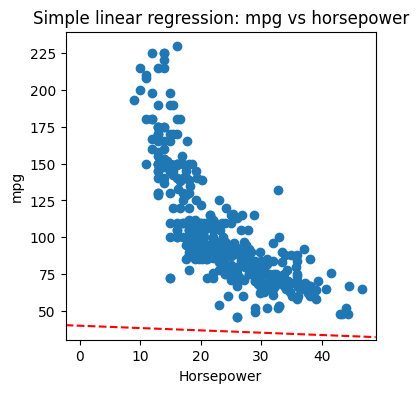

In [5]:
fig, ax = plt.subplots(figsize = (4,4))
ax.scatter (Auto['mpg'],Auto['horsepower'])
results.params
intercept, slope = results.params 
ax.axline((0, intercept),slope = slope, color='red', linestyle='--', label="Regression Line")
ax.set_xlabel('Horsepower')
ax.set_ylabel('mpg')
ax.set_title('Simple linear regression: mpg vs horsepower')
ax.legend
plt.show()


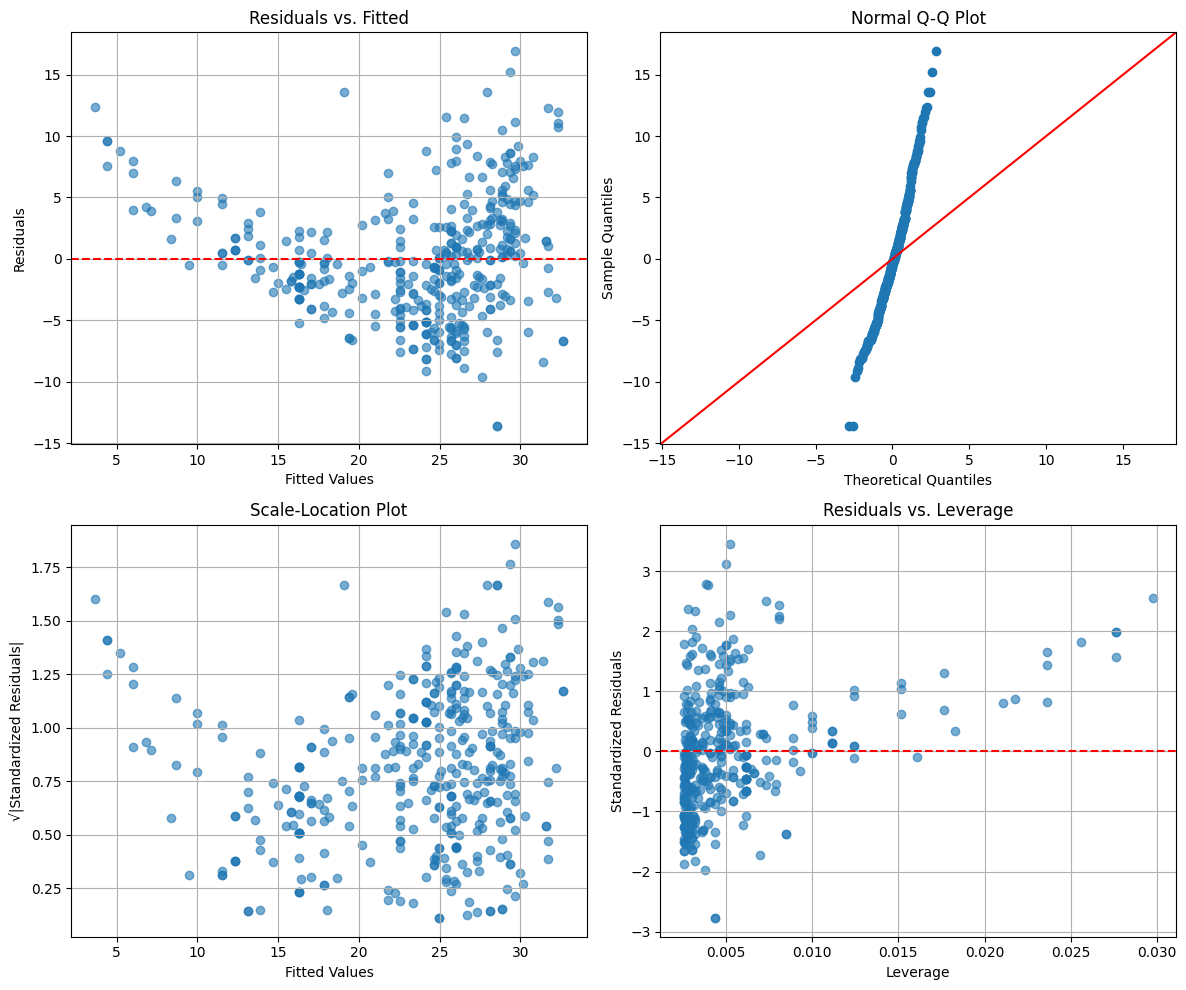

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import ModelSpec as MS

# Load dataset
Auto = load_data("Auto")

# Define model specification and fit it
design = MS(['horsepower']).fit(Auto)
X = design.transform(Auto)

# Fit the OLS model
model = sm.OLS(Auto['mpg'], X)
results = model.fit()


# Extract values for diagnostics
fitted_values = results.fittedvalues  # Predicted mpg
residuals = results.resid  # Residuals
standardized_residuals = results.get_influence().resid_studentized_internal  # Standardized residuals
leverage = results.get_influence().hat_matrix_diag  # Leverage values

# 🔹 Create Subplots for Diagnostics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ✅ 1. Residuals vs. Fitted Plot (Non-linearity Check)
axes[0, 0].scatter(fitted_values, residuals, alpha=0.6)
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_xlabel("Fitted Values")
axes[0, 0].set_ylabel("Residuals")
axes[0, 0].set_title("Residuals vs. Fitted")
axes[0, 0].grid()

# ✅ 2. Normal Q-Q Plot (Normality of Residuals)
sm.qqplot(residuals, line='45', ax=axes[0, 1])
axes[0, 1].set_title("Normal Q-Q Plot")

# ✅ 3. Scale-Location Plot (Homoscedasticity Check)
axes[1, 0].scatter(fitted_values, np.sqrt(abs(standardized_residuals)), alpha=0.6)
axes[1, 0].set_xlabel("Fitted Values")
axes[1, 0].set_ylabel("√|Standardized Residuals|")
axes[1, 0].set_title("Scale-Location Plot")
axes[1, 0].grid()

# ✅ 4. Residuals vs. Leverage Plot (Identifying Influential Points)
axes[1, 1].scatter(leverage, standardized_residuals, alpha=0.6)
axes[1, 1].axhline(0, color='red', linestyle='--')
axes[1, 1].set_xlabel("Leverage")
axes[1, 1].set_ylabel("Standardized Residuals")
axes[1, 1].set_title("Residuals vs. Leverage")
axes[1, 1].grid()

# Show plots
plt.tight_layout()
plt.show()
